# 13A_phewas_analysis

3/18/2021

check the psych phenotypes and what they are associated with which psych conditions

In [1]:
import pandas as pd
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
save_dir = 'ukbiobank_phewas/processed'

# 1. get data


In [2]:
# get psych codes
psych_codes = pd.read_csv('/Users/mguo123/Google Drive/0_altman/db/ukbiobank/psych_codes.csv')
print(len(psych_codes))
psych_codes[:5]

806


,key,description
0,189_irnt,Townsend deprivation index at recruitment
1,189_raw,Townsend deprivation index at recruitment
2,1920,Mood swings
3,1930,Miserableness
4,1940,Irritability


update 4/2/2021

- annotate snps with new stuff by disease
- only add in SCZ BPD, MDD, GAD

In [29]:
# manually create mapping
display(psych_codes[psych_codes.description.str.contains('ICD')].drop_duplicates())

code_to_dz = {
    'F20':'SCZ',
    'F31':'BPD',
    'F32':'MDD',
    'F33':'MDD',
    'F41':'GAD'
}

,key,description
250,F05,"Diagnoses - main ICD10: F05 Delirium, not indu..."
251,F10,Diagnoses - main ICD10: F10 Mental and behavio...
252,F20,Diagnoses - main ICD10: F20 Schizophrenia
253,F31,Diagnoses - main ICD10: F31 Bipolar affective ...
254,F32,Diagnoses - main ICD10: F32 Depressive episode
255,F33,Diagnoses - main ICD10: F33 Recurrent depressi...
256,F41,Diagnoses - main ICD10: F41 Other anxiety diso...
257,F43,Diagnoses - main ICD10: F43 Reaction to severe...
258,F45,Diagnoses - main ICD10: F45 Somatoform disorders
269,F52,Diagnoses - main ICD10: F52 Sexual dysfunction...


In [3]:
# set threshold
THRES = 0.05/len(psych_codes)
THRES = 0.05/100

In [4]:
# get phewas list
gwas_df_mpra_all = pd.read_csv('ukbiobank_phewas/gwas_df_mpra_filt_all.csv',index_col=0)
print(gwas_df_mpra_all.shape)
print(gwas_df_mpra_all.columns)
gwas_df_mpra_all[:5]


(399529, 22)
Index(['variant', 'minor_allele', 'minor_AF', 'low_confidence_variant',
       'n_complete_samples', 'AC', 'ytx', 'beta', 'se', 'tstat', 'pval',
       'seq_id', 'rowname', 'rsid', 'snp_type', 'seqnames', 'pos', 'strand',
       'alleles_as_ambig', 'phenotype', 'expected_case_minor_AC',
       'expected_min_category_minor_AC'],
      dtype='object')


,variant,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,...,rowname,rsid,snp_type,seqnames,pos,strand,alleles_as_ambig,phenotype,expected_case_minor_AC,expected_min_category_minor_AC
8,1:8033468:G:A,G,0.416500,False,360763,421011.0,920.369,0.005788,0.002370,2.44243,...,chr1_8033468,rs226242,linked,1,8033468,*,R,189_irnt,NaN,NaN
34,1:8066914:T:C,T,0.416282,False,360763,421168.0,897.387,0.005671,0.002367,2.39539,...,chr1_8066914,rs225100,linked,1,8066914,*,Y,189_irnt,NaN,NaN
35,1:8078309:T:C,T,0.423267,False,360763,416128.0,925.617,0.005899,0.002365,2.49395,...,chr1_8085328,rs400736,index,1,8078309,*,Y,189_irnt,NaN,NaN
36,1:8078309:T:C,T,0.423267,False,360763,416128.0,925.617,0.005899,0.002365,2.49395,...,chr1_8085328,rs400736,index,1,8078309,*,Y,189_irnt,NaN,NaN
37,1:8078309:T:C,T,0.423267,False,360763,416128.0,925.617,0.005899,0.002365,2.49395,...,chr1_8085328,rs400736,index,1,8078309,*,Y,189_irnt,NaN,NaN


In [8]:
# get annotation information
def get_id(row):
    chr_id = row['Chr'][3:]
    pos_str = str(row['Position'])
    ref_alt = ':'.join(row['Ref/Alt'].split('/'))
    return ':'.join([chr_id,pos_str,ref_alt])
mpra_res = pd.read_csv('figure_tables/lib_df_annon_mprasig_FINAL.csv')
mpra_res['gwas_id'] = mpra_res.apply(get_id,axis=1)
print(mpra_res.shape)
mpra_res_sel = mpra_res[['rowname','gwas_id','Linked_SNP','Index_SNP',
                         'diseases','egene_neurotissue_gtex','mpra_tissue','mpra_logfc_mean', 'mpra_pval_mean' ]]
mpra_res_sel[:5]

(637, 48)


,rowname,gwas_id,Linked_SNP,Index_SNP,diseases,egene_neurotissue_gtex,mpra_tissue,mpra_logfc_mean,mpra_pval_mean
0,chr5_96161942,5:96161942:T:G,rs152280,"rs10198241,rs469758",MDD,CAST|ERAP1|ERAP2,H9D10|H9D10|SLC|SLC,-0.922195,0.003159
1,chr22_42347060,22:42347060:T:C,rs5996094,rs1023500,SCZ,CCDC134|CYP2D6|DESI1|NAGA|TNFRSF13C,H9D10|H9D10,-0.766147,0.000356
2,chr7_28799411,7:28799411:A:G,rs10227088,rs10238623,GAD,NaN,H9D0|H9D0|H9D2|H9D2|H9D4|H9D4|HEK293|HEK293|SL...,-1.074166,0.000210
3,chr7_1962163,7:1962163:G:T,rs10268609,"rs10267593,rs4332037",BPD,NaN,HEK293|HEK293,-1.456217,0.001050
4,chr7_1915282,7:1915282:C:A,rs7788921,"rs10267593,rs4332037",BPD,NaN,H9D0|H9D0|H9D10|H9D10|H9D4|H9D4|HEK293|HEK293|...,-1.292504,0.000368


methodstr
Method used for testing and adjustment of pvalues. Can be either the full name or initial letters. Available methods are:


`statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)[source]¶`
- bonferroni : one-step correction
- sidak : one-step correction
- holm-sidak : step down method using Sidak adjustments
- holm : step-down method using Bonferroni adjustments
- simes-hochberg : step-up method (independent)
- hommel : closed method based on Simes tests (non-negative)
- fdr_bh : Benjamini/Hochberg (non-negative)
- fdr_by : Benjamini/Yekutieli (negative)
- fdr_tsbh : two stage fdr correction (non-negative)
- fdr_tsbky : two stage fdr correction (non-negative)

In [9]:
from statsmodels.stats.multitest import multipletests

# def get_fdr(p_vals):

#     from scipy.stats import rankdata
#     ranked_p_values = rankdata(p_vals)
#     fdr = p_vals * len(p_vals) / ranked_p_values
#     fdr[fdr > 1] = 1

#     return fdr

# def get_bh(p_vals):
#     multipletests(pvals,

In [10]:
# %%time
# merge two df
gwas_df_mpra_all_merge = gwas_df_mpra_all.merge(mpra_res_sel, how='left',on='rowname').merge(psych_codes, left_on='phenotype',right_on='key')

print(gwas_df_mpra_all_merge.shape)
# readjust pval - fdr/bh
gwas_df_mpra_all_merge['padj'] = multipletests(gwas_df_mpra_all_merge.pval.values, 
#                                                method='fdr_bh')[1]
                                               method='fdr_by')[1]
gwas_df_mpra_all_filt = gwas_df_mpra_all_merge[gwas_df_mpra_all_merge.padj<0.10]
print(gwas_df_mpra_all_filt.shape)
print(gwas_df_mpra_all_filt.pval.max())
print(gwas_df_mpra_all_filt.columns)
gwas_df_mpra_all_filt[:5]

(1412885, 32)
(385282, 33)
0.00184945
Index(['variant', 'minor_allele', 'minor_AF', 'low_confidence_variant',
       'n_complete_samples', 'AC', 'ytx', 'beta', 'se', 'tstat', 'pval',
       'seq_id', 'rowname', 'rsid', 'snp_type', 'seqnames', 'pos', 'strand',
       'alleles_as_ambig', 'phenotype', 'expected_case_minor_AC',
       'expected_min_category_minor_AC', 'gwas_id', 'Linked_SNP', 'Index_SNP',
       'diseases', 'egene_neurotissue_gtex', 'mpra_tissue', 'mpra_logfc_mean',
       'mpra_pval_mean', 'key', 'description', 'padj'],
      dtype='object')


,variant,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,...,Linked_SNP,Index_SNP,diseases,egene_neurotissue_gtex,mpra_tissue,mpra_logfc_mean,mpra_pval_mean,key,description,padj
1122,2:102968285:T:C,C,0.382256,False,360763,275807.0,-719.723,-0.008143,0.002406,-3.38475,...,rs37711,"rs13015714,rs6419573,rs9807989,rs13408661,rs10...",BPD|SCZ,IMMP2L,H9D10|H9D10,1.702208,1.173827e-25,189_irnt,Townsend deprivation index at recruitment,0.048666
1123,2:102968285:T:C,C,0.382256,False,360763,275807.0,-719.723,-0.008143,0.002406,-3.38475,...,rs37711,"rs13015714,rs6419573,rs9807989,rs13408661,rs10...",BPD|SCZ,IMMP2L,H9D10|H9D10,1.702208,1.173827e-25,189_irnt,Townsend deprivation index at recruitment,0.048666
1124,2:102968285:T:C,C,0.382256,False,360763,275807.0,-719.723,-0.008143,0.002406,-3.38475,...,rs37711,"rs13015714,rs6419573,rs9807989,rs13408661,rs10...",BPD|SCZ,IMMP2L,H9D10|H9D10,1.702208,1.173827e-25,189_irnt,Townsend deprivation index at recruitment,0.048666
1125,2:102968285:T:C,C,0.382256,False,360763,275807.0,-719.723,-0.008143,0.002406,-3.38475,...,rs37711,"rs13015714,rs6419573,rs9807989,rs13408661,rs10...",BPD|SCZ,IMMP2L,H9D10|H9D10,1.702208,1.173827e-25,189_irnt,Townsend deprivation index at recruitment,0.048666
1126,2:102968285:T:C,C,0.382256,False,360763,275807.0,-719.723,-0.008143,0.002406,-3.38475,...,rs37711,"rs13015714,rs6419573,rs9807989,rs13408661,rs10...",BPD|SCZ,IMMP2L,H9D10|H9D10,1.702208,1.173827e-25,189_irnt,Townsend deprivation index at recruitment,0.048666


In [11]:
abs(gwas_df_mpra_all_filt.beta).describe()

count    385282.000000
mean          0.032873
std           2.223273
min           0.000142
25%           0.005320
50%           0.007281
75%           0.010433
max         229.978000
Name: beta, dtype: float64

problem with pvalue correction i

,rank,obs_log_pval,exp_log_pval
0,1,0.132591,6.150107e+00
1,2,0.132591,5.849077e+00
2,3,0.132591,5.672986e+00
3,4,0.132591,5.548047e+00
4,5,0.132591,5.451137e+00
...,...,...,...
1412880,1412881,17.562446,1.229527e-06
1412881,1412882,17.562446,9.221450e-07
1412882,1412883,17.562446,6.147631e-07
1412883,1412884,17.562446,3.073814e-07


<Figure size 432x288 with 0 Axes>

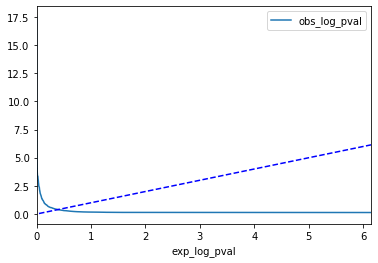

In [12]:
pval_df = pd.DataFrame(pd.Series(-np.log10(gwas_df_mpra_all_merge.padj)).sort_values().reset_index(drop=True))
pval_df = pval_df.reset_index()
pval_df.columns = ['rank','obs_log_pval']
pval_df['rank'] = pval_df['rank']+1
pval_df['exp_log_pval'] = -np.log10(((pval_df['rank'])/(pval_df.shape[0])))
pval_df = pval_df[~pval_df.isin([np.nan, np.inf, -np.inf]).any(1)]
display(pval_df)
fig = plt.figure()
pval_df.plot(x='exp_log_pval',y='obs_log_pval')
plt.plot(pval_df.exp_log_pval,pval_df.exp_log_pval, '--b')

# 2. create snp x phenotype matrix with beta values (and another with mpra_logfc_mean)

In [30]:
def add_dz(dz_str,dz_to_add):
    if dz_to_add in dz_str:
        return dz_str
    else:
        return '|'.join(sorted(dz_str.split('|') + [dz_to_add]))

In [31]:
# takes a bit can speed up but deemed unnecessary
for code, dz in code_to_dz.items():
    print('((()))', code,dz)
    for idx, row in gwas_df_mpra_all_filt.iterrows():
        if row['key']=='code':
            gwas_df_mpra_all_filt.at[idx,'diseases'] = add_dz(row['diseases'],dz)

((())) F20 SCZ
((())) F31 BPD
((())) F32 MDD
((())) F33 MDD
((())) F41 GAD


In [32]:
snp_phenotype_long_df = gwas_df_mpra_all_filt.groupby(['rowname','description','diseases']).agg({'beta':'mean',
                                                                      'mpra_logfc_mean':'mean'}).reset_index()

display(snp_phenotype_long_df[:5])

snp_phenotype_long_df.to_csv(os.path.join(save_dir, 'snp_phenotype_long_df_original.csv'))


,rowname,description,diseases,beta,mpra_logfc_mean
0,chr10_104359350,Ever sought or received professional help for ...,SCZ,-0.011639,2.066716
1,chr10_104359350,Ever talked to a health professional about unu...,SCZ,0.000032,2.066716
2,chr10_104426177,Activities undertaken to treat depression: Tal...,SCZ,-0.010042,-0.919570
3,chr10_104426177,Ever sought or received professional help for ...,SCZ,-0.011713,-0.919570
4,chr10_104556054,Avoided activities or situations because of pr...,SCZ,0.019826,-1.502654


In [33]:
snp_phenotype_long_df

,rowname,description,diseases,beta,mpra_logfc_mean
0,chr10_104359350,Ever sought or received professional help for ...,SCZ,-0.011639,2.066716
1,chr10_104359350,Ever talked to a health professional about unu...,SCZ,0.000032,2.066716
2,chr10_104426177,Activities undertaken to treat depression: Tal...,SCZ,-0.010042,-0.919570
3,chr10_104426177,Ever sought or received professional help for ...,SCZ,-0.011713,-0.919570
4,chr10_104556054,Avoided activities or situations because of pr...,SCZ,0.019826,-1.502654
...,...,...,...,...,...
3250,chr9_5231712,Risk taking,PD,-0.004045,-0.746531
3251,chr9_7171606,Belittlement by partner or ex-partner as an adult,SCZ,0.012389,-1.121100
3252,chr9_7180490,Belittlement by partner or ex-partner as an adult,SCZ,0.012435,0.874267
3253,chr9_94863064,Manifestations of mania or irritability: I was...,BPD|SCZ,0.007284,0.884797


In [34]:
snp_phenotype_long_df.beta.describe()

count    3255.000000
mean        0.215819
std         6.980318
min        -1.251705
25%        -0.008018
50%        -0.002593
75%         0.006245
max       229.978000
Name: beta, dtype: float64

In [35]:
# manual fix
snp_phenotype_long_df.at[snp_phenotype_long_df.beta>10,'beta'] = 2

In [36]:
snp_phenotype_long_df.beta.describe()

count    3255.000000
mean        0.005701
std         0.116912
min        -1.251705
25%        -0.008018
50%        -0.002593
75%         0.006245
max         2.227160
Name: beta, dtype: float64

In [37]:
snp_phenotype_wide_df = snp_phenotype_long_df.pivot(index='rowname',columns='description',values='beta').fillna(0)### TODO save this
snp_phenotype_wide_df.to_csv(os.path.join(save_dir,'snp_phenotype_wide_df_beta.csv'))


In [38]:
xs = [-2,-10,0]


manually rewrite phenotypes -

In [39]:
snp_phenotype_wide_df = pd.read_csv(os.path.join(save_dir, 'snp_phenotype_wide_df_beta_manual.csv'))
snp_phenotype_wide_df.dropna(inplace=True)
# snp_phenotype_wide_df = snp_phenotype_wide_df.drop('rowname',axis=1)
description_to_name = pd.Series(snp_phenotype_wide_df.new_name.values,
          index=snp_phenotype_wide_df.rowname.values).to_dict()

In [40]:
# map everything
def take_max(xs):
    # take max magnitude (and sign)
    return xs[np.argmax(np.abs(xs))]
snp_phenotype_long_df['description_abbr'] = snp_phenotype_long_df.description.map(description_to_name)
snp_phenotype_long_df = snp_phenotype_long_df.groupby(['rowname','description_abbr',
                              'diseases']).agg({'beta':take_max,
                                                'mpra_logfc_mean':take_max}
    
).reset_index()
snp_phenotype_long_df.to_csv(os.path.join(save_dir, 'snp_phenotype_long_df.csv'))
snp_phenotype_long_df.shape

/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


(1960, 5)

In [41]:
# new snp_phenotype wide file
snp_phenotype_wide_df = snp_phenotype_long_df.pivot(index='rowname',columns='description_abbr',values='beta').fillna(0)### TODO save this
snp_phenotype_wide_df.to_csv(os.path.join(save_dir,'snp_phenotype_wide_df_beta.csv'))


In [42]:
# get other wide tables
snp_phenotype_wide_df_bin = snp_phenotype_wide_df.copy()
snp_phenotype_wide_df_bin[snp_phenotype_wide_df_bin!=0]= 1
print(snp_phenotype_wide_df_bin.shape)
snp_phenotype_wide_df_logfc = snp_phenotype_long_df.pivot(index='rowname',columns='description_abbr',values='mpra_logfc_mean').fillna(0)### TODO save this

snp_phenotype_wide_df_logfc.to_csv(os.path.join(save_dir,'snp_phenotype_wide_df_mpralogfc.csv'))
snp_phenotype_wide_df_bin.to_csv(os.path.join(save_dir,'snp_phenotype_wide_df_bin.csv'))


(421, 65)


# 2B = egene_phenotype mappings

In [134]:
# def merge_dz_strs(arr):
#     dzs = []
#     for dz_str in arr:
#         dzs+=dz_str.split('|')
#     return '|'.join(sorted(set(dzs)))

# def get_max_mag(arr):
#     arr_abs = np.abs(arr) 
#     max_index = np.argmax(arr_abs) 
#     return arr[max_index] 

In [135]:
# rowname_to_gene = (mpra_res[['rowname','egene_neurotissue_gtex']]
#     .dropna()
#     .assign(gene=mpra_res['egene_neurotissue_gtex'].str.split('|')).explode('gene')

# )
# rowname_to_gene= rowname_to_gene[['rowname','gene']]
# gene_phenotype_long_df = (snp_phenotype_long_df
#     .merge(rowname_to_gene)
#     .groupby(['gene','description_abbr'])
#         .agg({'diseases': merge_dz_strs, 
#              'beta':get_max_mag,
#               'mpra_logfc_mean':get_max_mag})
#     .reset_index()
#                          )

# 3. create disease x phenotype matrix 


In [43]:
diseases = set()
for dis_str in gwas_df_mpra_all_filt.diseases.unique():
    diseases = diseases.union(set(dis_str.split('|')))
diseases = sorted(diseases)
print(diseases)

['ADHD', 'ASD', 'BLPD', 'BPD', 'GAD', 'MDD', 'OCD', 'PD', 'PTSD', 'SCZ']


In [44]:
# for dz in diseases:
#     snp_phenotype_long_df[dz] = snp_phenotype_long_df.diseases.str.contains(dz)
snp_phenotype_long_df[:5]

,rowname,description_abbr,diseases,beta,mpra_logfc_mean
0,chr10_104359350,past treatment of mental distress,SCZ,-0.011639,2.066716
1,chr10_104359350,psychosis history,SCZ,0.000032,2.066716
2,chr10_104426177,anxiety treatment,SCZ,-0.010042,-0.919570
3,chr10_104426177,past treatment of mental distress,SCZ,-0.011713,-0.919570
4,chr10_104556054,loneliness,SCZ,-0.006671,-1.502654


In [45]:
snp_phenotype_long_df.beta.describe()

count    1960.000000
mean        0.010231
std         0.150141
min        -1.251705
25%        -0.007803
50%        -0.002467
75%         0.006123
max         2.227160
Name: beta, dtype: float64

In [46]:
dz_phenotype_long_df = snp_phenotype_long_df.set_index(['rowname', 'description_abbr','beta','mpra_logfc_mean']).apply(
    lambda x: x.str.split('|').explode()).reset_index()
dz_phenotype_long_df[:5]

,rowname,description_abbr,beta,mpra_logfc_mean,diseases
0,chr10_104359350,past treatment of mental distress,-0.011639,2.066716,SCZ
1,chr10_104359350,psychosis history,0.000032,2.066716,SCZ
2,chr10_104426177,anxiety treatment,-0.010042,-0.919570,SCZ
3,chr10_104426177,past treatment of mental distress,-0.011713,-0.919570,SCZ
4,chr10_104556054,loneliness,-0.006671,-1.502654,SCZ


In [47]:
dz_phenotype_count_wide_df = dz_phenotype_long_df.pivot_table(values='beta', index='description_abbr', columns = 'diseases',
                         aggfunc=lambda x: len(x.unique())).fillna(0)
dz_phenotype_count_wide_df.shape

(65, 10)

In [48]:
dz_phenotype_betamean_wide_df = dz_phenotype_long_df.pivot_table(values='beta', index='description_abbr', columns = 'diseases',
                         aggfunc=lambda x: np.mean(x)
#                          aggfunc=lambda x: take_max(x)
                                                                ).fillna(0)
dz_phenotype_betamean_wide_df.shape

(65, 10)

In [49]:
dz_phenotype_betamean_wide_df

diseases,ADHD,ASD,BLPD,BPD,GAD,MDD,OCD,PD,PTSD,SCZ
description_abbr,,,,,,,,,,
addictive behavior,0.000000,0.000000,0.000000,-0.038577,0.000000,0.000000,0.000000,0.000000,0.000000,-0.015681
agoraphobia,0.001048,0.000000,0.000000,0.001198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000401
alcohol abuse,0.000000,0.000000,-0.000247,-0.000314,-0.000242,0.000000,0.000000,-0.000045,0.000000,-0.029359
alcohol abuse in environment,0.003440,0.196170,-0.003790,-0.006384,-0.003790,-0.003090,-0.003790,0.000000,0.003440,-0.003513
anhedonia,-0.011544,0.000000,0.000000,-0.000111,0.000000,0.001027,0.000000,0.000000,0.000000,-0.004654
...,...,...,...,...,...,...,...,...,...,...
substance abuse,-0.003785,0.000000,-0.008055,-0.005220,-0.005061,0.000536,0.000000,0.000000,0.000000,-0.005617
tense,-0.004768,0.000000,0.000000,-0.004811,0.000000,0.003329,0.000000,0.000000,-0.015919,-0.002519
weight change,0.000000,0.000061,0.000000,0.010310,0.000000,-0.005598,0.000000,-0.009143,0.000000,0.007212


In [50]:
dz_phenotype_long_df.to_csv(os.path.join(save_dir, 'dz_phenotype_long_df.csv'))
dz_phenotype_count_wide_df.to_csv(os.path.join(save_dir,'dz_phenotype_count_wide_df.csv'))
dz_phenotype_betamean_wide_df.to_csv(os.path.join(save_dir,'dz_phenotype_betamean_wide_df.csv'))


# 3. drugs 

In [83]:
drug_codes = pd.read_csv('/Users/mguo123/Google Drive/0_altman/db/ukbiobank/treatment_codes.csv')
# drug_codes['drug_abbr'] = drug_codes['Phenotype Description'].apply(lambda x:
#                                                                    x.split(':')[-1].strip(' '))
# pd.read_excel('/Users/mguo123/Google Drive/0_altman/db/ukbiobank/UKBB GWAS Imputed v3 - File Manifest Release 20180731.xlsx',sheet_name='Manifest 201807')
drug_codes.columns


Index(['Phenotype Code', 'Phenotype Description', 'drug_abbr', 'Unnamed: 3',
       'Unnamed: 4'],
      dtype='object')

In [84]:
# drug_codes

In [85]:
psych_drugs = pd.read_csv('/Users/mguo123/Google Drive/0_altman/projects/ukbb_psych_project/data/psych_drugs_v2.csv')
psych_drugs.columns

Index(['Full_ATC', 'Drug_name', 'ATC_level3', 'ATC_level3_name', 'ATC_level4',
       'ATC_level4_name', 'Manual Annotation', 'Disease', 'Paired with',
       'Comments'],
      dtype='object')

In [86]:
drug_codes['is_psych'] = drug_codes.drug_abbr.isin(psych_drugs.Drug_name.values)
drug_codes = drug_codes.merge(psych_drugs, how='left', left_on='drug_abbr',right_on='Drug_name')
print(drug_codes.shape)
drug_codes[drug_codes.is_psych][:5]

(616, 16)


,Phenotype Code,Phenotype Description,drug_abbr,Unnamed: 3,Unnamed: 4,is_psych,Full_ATC,Drug_name,ATC_level3,ATC_level3_name,ATC_level4,ATC_level4_name,Manual Annotation,Disease,Paired with,Comments
58,20003_1140863152,Treatment/medication code: diazepam,diazepam,NaN,NaN,True,N05BA01,diazepam,N05B,Anxiolytics,N05BA,Benzodiazepine derivatives,Benzodiazepine,GAD,NaN,"Calming effect, first line"
61,20003_1140863302,Treatment/medication code: lorazepam,lorazepam,NaN,NaN,True,N05BA06,lorazepam,N05B,Anxiolytics,N05BA,Benzodiazepine derivatives,Benzodiazepine,GAD,NaN,NaN
107,20003_1140867444,Treatment/medication code: risperidone,risperidone,NaN,NaN,True,N05AX08,risperidone,N05A,Antipsychotics,N05AX,Other antipsychotics,Atypical antipsychotic,"SCZ, BPD",NaN,Dopamine and serotonin antagonist; SE: hyperpr...
108,20003_1140867490,Treatment/medication code: lithium product,lithium,NaN,NaN,True,N05AN01,lithium,N05A,Antipsychotics,N05AN,Lithum,Lithium,BPD,NaN,NaN
110,20003_1140867726,Treatment/medication code: lofepramine,lofepramine,NaN,NaN,True,N06AA07,lofepramine,N06A,Antidepressants,N06AA,Centrally acting sympathomimetics,TCA,MDD,NaN,Third-generation TCA


In [87]:
# drugs that are in phenotype set
drug_codes[drug_codes.is_psych].drug_abbr.values

array(['diazepam', 'lorazepam', 'risperidone', 'lithium', 'lofepramine',
       'nortriptyline', 'sertraline', 'paroxetine', 'prochlorperazine',
       'fluoxetine', 'amitriptyline', 'clomipramine', 'imipramine',
       'trazodone', 'chlorpromazine', 'hydroxyzine', 'dosulepin',
       'venlafaxine', 'citalopram', 'olanzapine', 'mirtazapine',
       'quetiapine', 'escitalopram', 'duloxetine'], dtype=object)

In [88]:
%%time
# code = '20003_1140867444'#drug_codes['Phenotype Code'][0]
df_drug_all = pd.DataFrame()
for idx, row in drug_codes.iterrows():
    code = row['Phenotype Code']
    drug = row['drug_abbr']
    file = os.path.join('ukbiobank_phewas', 'results_' + code + '.csv')
    if os.path.exists(file):
        df = pd.read_csv(file, index_col=0)
        df['drug'] = drug
        df_drug_all = pd.concat([df_drug_all, df[df.pval<0.05]])

CPU times: user 4min 26s, sys: 4.97 s, total: 4min 31s
Wall time: 40.3 s


In [89]:
# df = pd.read_csv(file,index_col=0)
# df['drug'] = row['drug_abbr']
# df[df.pval<0.05]
df_drug_all.shape

(132340, 22)

In [90]:
# merge mpra
df_drug_all['padj'] = multipletests(df_drug_all.pval.values, 
#                                                method='fdr_bh')[1]
                                               method='fdr_by')[1]
df_drug_all_filt = df_drug_all[df_drug_all.padj<0.10]

df_drug_all_mpra_filt = df_drug_all_filt.merge(mpra_res_sel, how='left',on='rowname')



# df_drug_all_mpra = df_drug_all.merge(mpra_res_sel, how='left',on='rowname')

# print(df_drug_all_mpra.shape)
# readjust pval - fdr/bh
# df_drug_all_mpra['padj'] = multipletests(df_drug_all_mpra.pval.values, 
# #                                                method='fdr_bh')[1]
#                                                method='fdr_by')[1]
# df_drug_all_mpra_filt = df_drug_all_mpra[df_drug_all_mpra.padj<0.10]
print(df_drug_all_mpra_filt.shape)
print(df_drug_all_mpra_filt.pval.max())
print(df_drug_all_mpra_filt.columns)
df_drug_all_mpra_filt[:5]

(5304, 31)
0.000321996
Index(['variant', 'minor_allele', 'minor_AF', 'expected_case_minor_AC',
       'low_confidence_variant', 'n_complete_samples', 'AC', 'ytx', 'beta',
       'se', 'tstat', 'pval', 'seq_id', 'rowname', 'rsid', 'snp_type',
       'seqnames', 'pos', 'strand', 'alleles_as_ambig', 'phenotype', 'drug',
       'padj', 'gwas_id', 'Linked_SNP', 'Index_SNP', 'diseases',
       'egene_neurotissue_gtex', 'mpra_tissue', 'mpra_logfc_mean',
       'mpra_pval_mean'],
      dtype='object')


,variant,minor_allele,minor_AF,expected_case_minor_AC,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,...,drug,padj,gwas_id,Linked_SNP,Index_SNP,diseases,egene_neurotissue_gtex,mpra_tissue,mpra_logfc_mean,mpra_pval_mean
0,1:8484529:A:G,G,0.095497,33.23310,False,361141,68976.0,53.0000,0.000318,0.000088,...,senokot,0.095770,1:8484529:A:G,rs57310340,"rs301797,rs301798",SCZ,RERE,HEK293|HEK293,0.756852,5.442542e-03
1,8:89331430:A:G,G,0.020876,7.26473,True,361141,15078.1,19.0863,0.000808,0.000182,...,senokot,0.004984,8:89331430:A:G,rs73692227,rs7837860,SCZ,NaN,SLC|SLC,0.716096,8.429834e-12
2,1:11831875:A:G,G,0.107561,28.39620,False,361141,77689.5,10.0667,-0.000265,0.000073,...,coversyl,0.085838,1:11831875:A:G,rs55929441,"rs17037390,rs12561919,rs17367504",SCZ,CLCN6|MTHFR|NPPA-AS1,H9D10|H9D10|H9D4|H9D4|SLC|SLC,0.532884,2.020917e-03
3,1:11846742:C:T,T,0.108564,28.66080,False,361141,78413.6,10.0314,-0.000267,0.000072,...,coversyl,0.074536,1:11874855:T:C,rs149393118,"rs1537514,rs2066470,rs2184227,rs2274976,rs3737...",SCZ,CLCN6|MTHFR|NPPA-AS1,H9D4|H9D4|HEK293|HEK293,1.985091,2.120531e-03
4,1:11847772:G:T,T,0.108297,28.59040,False,361141,78220.8,10.0039,-0.000267,0.000072,...,coversyl,0.075329,1:11874855:T:C,rs149393118,"rs1537514,rs2066470,rs2184227,rs2274976,rs3737...",SCZ,CLCN6|MTHFR|NPPA-AS1,H9D4|H9D4|HEK293|HEK293,1.985091,2.120531e-03


In [91]:
drug_snp_df = df_drug_all_mpra_filt.groupby(['rowname','drug','diseases']).agg({'beta':'mean',
                                                                                'mpra_logfc_mean':'mean'}).reset_index()
drug_snp_df['is_psych'] = drug_snp_df.drug.isin(psych_drugs.Drug_name)                                                                    
drug_snp_df.is_psych.value_counts()
# display(snp_phenotype_long_df[:5])

# snp_phenotype_long_df.to_csv(os.path.join(save_dir, 'snp_phenotype_long_df_original.csv'))


False    685
True      23
Name: is_psych, dtype: int64

In [95]:
drug_snp_df.to_csv(os.path.join(save_dir, 'drug_snp_df.csv'))

In [150]:
drug_snp_df = pd.read_csv(os.path.join(save_dir, 'drug_snp_df.csv'),index_col=0)
drug_snp_df

,rowname,drug,diseases,beta,mpra_logfc_mean,is_psych
0,chr10_104556054,aspirin,SCZ,-0.001507,-1.502654,False
1,chr10_104556054,bendroflumethiazide,SCZ,0.003399,-1.502654,False
2,chr10_104953007,loratadine,SCZ,-0.000921,-5.187099,False
3,chr10_116713151,balsalazide,ADHD|BPD,0.000165,-0.945045,False
4,chr10_116713151,prozac,ADHD|BPD,0.000333,-0.945045,False
...,...,...,...,...,...,...
703,chr9_5231712,hydroxycarbamide,PD,0.000385,-0.746531,False
704,chr9_5231712,methotrexate,PD,-0.000853,-0.746531,False
705,chr9_5231712,rhinocort,PD,0.004129,-0.746531,False
706,chr9_94863064,nitromin,BPD|SCZ,0.000244,0.884797,False


In [92]:
df_drug_all_filt['is_psych'] = df_drug_all_filt.drug.isin(psych_drugs.Drug_name)                                                                    
df_drug_all_filt.is_psych.value_counts()


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False    5213
True       91
Name: is_psych, dtype: int64

In [97]:
df_drug_all_filt.is_psych.value_counts()-drug_snp_df.is_psych.value_counts()


False    4528
True       68
Name: is_psych, dtype: int64

In [155]:
23/(685+23)

0.03248587570621469

In [153]:
68/(4528+68)

0.014795474325500435

In [98]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[23, 685], [68, 4528]])
pvalue

0.0017147494802041024

asaSNP hits are enriched for psychiatric drugs 

In [101]:
df_drug_all_filt[df_drug_all_filt.is_psych]

,variant,minor_allele,minor_AF,expected_case_minor_AC,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,...,rsid,snp_type,seqnames,pos,strand,alleles_as_ambig,phenotype,drug,padj,is_psych
966,5:56199202:G:A,G,0.348498,687.9350,False,361141,470568.0,1362.1000,0.000476,0.000129,...,rs832540,index,5,56199202,*,R,20003_1140863152,diazepam,0.079407,True
335,1:11896345:T:C,C,0.139884,55.1144,False,361141,101036.0,30.0000,-0.000292,0.000079,...,rs198402,linked,1,11896345,*,Y,20003_1140867444,risperidone,0.078454,True
3884,21:40908952:C:G,G,0.062535,24.6388,True,361141,45167.9,42.0275,0.000414,0.000114,...,rs4818048,index,21,40908952,*,S,20003_1140867444,risperidone,0.088497,True
3885,21:40908952:C:G,G,0.062535,24.6388,True,361141,45167.9,42.0275,0.000414,0.000114,...,rs4818048,index,21,40908952,*,S,20003_1140867444,risperidone,0.088497,True
3886,21:40908952:C:G,G,0.062535,24.6388,True,361141,45167.9,42.0275,0.000414,0.000114,...,rs4818048,index,21,40908952,*,S,20003_1140867444,risperidone,0.088497,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,5:159595035:C:A,A,0.103147,202.7870,False,361141,74501.3,252.5330,0.000734,0.000202,...,rs75583333,index,5,159595035,*,M,20003_1141152732,mirtazapine,0.091056,True
1117,5:159595035:C:A,A,0.103147,202.7870,False,361141,74501.3,252.5330,0.000734,0.000202,...,rs75583333,index,5,159595035,*,M,20003_1141152732,mirtazapine,0.091056,True
1118,5:159595035:C:A,A,0.103147,202.7870,False,361141,74501.3,252.5330,0.000734,0.000202,...,rs75583333,index,5,159595035,*,M,20003_1141152732,mirtazapine,0.091056,True
1119,5:159595035:C:A,A,0.103147,202.7870,False,361141,74501.3,252.5330,0.000734,0.000202,...,rs75583333,index,5,159595035,*,M,20003_1141152732,mirtazapine,0.091056,True


## todo add to figure tables annotation 

In [102]:
mpra_res_df = pd.read_csv('figure_tables/lib_df_annon_mprasig_FINAL_updatedMDD.csv',index_col=0)
mpra_res_df.columns

Index(['rowname', 'Linked_SNP', 'Chr', 'Position', 'Ref/Alt', 'Index_SNP',
       'ConsScore', 'ConsDetail', 'diseases', 'num_dz', 'gwas_pval', 'source',
       'gene_annon', 'ngene_haploreg', 'egene_alltissue_gtex',
       'egene_neurotissue_gtex', 'egene_neurotissue_mapgene_gtex',
       'egene_neurotissue_maptissue_gtex', 'atac_tissues', 'bool_in_atac_pk',
       'hichip_tissues', 'bool_in_hichip_pk', 'broken_motifs', 'gained_motifs',
       'drug_target_gene', 'drug_target_pertname', 'drug_target_moa',
       'drug_target_clinical_phase', 'drug_target_indication',
       'drug_cmap_gene_up', 'drug_cmap_pertname_up', 'drug_cmap_gene_dn',
       'drug_cmap_pertname_dn', 'tissue_asatac', 'bool_is_asatac',
       'tissue_ashichip', 'bool_is_ashichip', 'mpra_tissue', 'mpra_pval_str',
       'mpra_pval_mean', 'mpra_logfc_str', 'mpra_logfc_mean', 'bool_mpra_sig',
       'cgene_egene_agree', 'cgene_egene_agree_num', 'bool_cgene_egene_agree'],
      dtype='object')

In [103]:
drug_snp_df_to_merge = drug_snp_df.drop(['diseases','mpra_logfc_mean','is_psych'],axis=1)
drug_snp_df_to_merge = drug_snp_df_to_merge.groupby('rowname').agg({'drug':
                                             lambda arr: '|'.join(sorted(set(arr)))}).reset_index()# drug_snp_df.columns = ['rowname','ukbb_drug_hits','ukbb_beta','']
drug_snp_df_to_merge.columns = ['rowname', 'ukbb_drug']

In [104]:
dz_snp_df_to_merge = dz_phenotype_long_df.drop(['diseases','mpra_logfc_mean'],axis=1)
dz_snp_df_to_merge = dz_snp_df_to_merge.groupby('rowname').agg({'description_abbr':
                                             lambda arr: '|'.join(arr),
                                                               'beta':
                                             lambda arr: '|'.join(["%.3f"%s for s in arr])}).reset_index()
dz_snp_df_to_merge.columns = ['rowname','ukbb_phenotype','ukbb_phenotype_beta']
dz_snp_df_to_merge


,rowname,ukbb_phenotype,ukbb_phenotype_beta
0,chr10_104359350,past treatment of mental distress|psychosis hi...,-0.012|0.000
1,chr10_104426177,anxiety treatment|past treatment of mental dis...,-0.010|-0.012
2,chr10_104556054,loneliness|stress|worry,-0.007|0.020|0.008
3,chr10_104598322,cannibis use|cannibis use|depression history|d...,0.018|0.018|-0.019|-0.019|0.017|0.017|0.004|0....
4,chr10_104767185,cannibis use|cannibis use|cannibis use|depress...,0.022|0.022|0.022|-0.168|-0.168|-0.168|0.012|0...
...,...,...,...
416,chr9_5231712,eating disorders|recklessness|worry,0.010|-0.004|-0.093
417,chr9_7171606,past abuse,0.012
418,chr9_7180490,past abuse,0.012
419,chr9_94863064,distracted|distracted,0.007|0.007


In [105]:
mpra_res_df = mpra_res_df.merge(drug_snp_df_to_merge,
                  how='left',on='rowname').merge(dz_snp_df_to_merge,
                  how='left',on='rowname').fillna('')

In [289]:
mpra_res_df.to_csv('figure_tables/mpra_res_df_UPDATED_UKBB.csv')

# gene x phenotype matrix 2.0

In [ ]:
# make a ukbb phenotype egene beta table
idx_new = 0
gene_phenotype_long = pd.DataFrame()
for idx, row in mpra_res_df.iterrows():
    

In [140]:
all_genes = pd.read_csv('D_mpraanalyze_barcode_allelic/egene_gtex/all.txt',header=None).iloc[:,0].values
all_genes.shape

(429,)

In [124]:
def get_list(col_values):
    flat_list = [item for sublist in col_values for item in sublist]
    return flat_list

In [133]:
all_gene_beta_df = pd.DataFrame()
for gene in all_genes:
    gene_df = mpra_res_df[mpra_res_df.egene_neurotissue_gtex.str.contains(gene)
               ].sort_values('rowname')
    # display(gene_df)
    gene_beta_df = pd.DataFrame(pd.Series(dict(zip(get_list(gene_df.ukbb_phenotype.str.split('|').to_list()), 
             get_list(gene_df.ukbb_phenotype_beta.str.split('|').to_list()))))).reset_index()
    gene_beta_df.columns = ['phenotype','beta']
    gene_beta_df['gene'] = gene
    print(gene, gene_beta_df.shape)
    all_gene_beta_df = pd.concat([all_gene_beta_df, gene_beta_df])
    


AADAT (2, 3)
ABCB9 (5, 3)
ABCC8 (1, 3)
ABHD16A (11, 3)
ABT1 (8, 3)
ACADM (1, 3)
ACO2 (17, 3)
ADAMTS2 (2, 3)
AGER (2, 3)
AGT (1, 3)
AIF1 (11, 3)
AKT1 (1, 3)
ALKBH5 (2, 3)
ALMS1 (1, 3)
ALPK3 (9, 3)
ANGEL1 (2, 3)
ANK3 (11, 3)
ANKRD13B (1, 3)
AP3B2 (1, 3)
APOPT1 (5, 3)
ARC (6, 3)
ARHGAP1 (4, 3)
ARHGAP9 (1, 3)
ARL3 (11, 3)
ARL6IP4 (5, 3)
ARNT (1, 3)
AS3MT (8, 3)
ASAP1 (6, 3)
ATP6V1D (5, 3)
ATXN7 (2, 3)
BAG4 (5, 3)
BAG5 (5, 3)
BAK1 (5, 3)
BANF1 (1, 3)
BDH2 (6, 3)
BIN3 (5, 3)
BLMH (1, 3)
BOLA3 (1, 3)
BOLA3-AS1 (1, 3)
BRD2 (1, 3)
BTN3A2 (19, 3)
BTN3A3 (8, 3)
C1QTNF4 (6, 3)
C4A (22, 3)
CABLES2 (2, 3)
CALHM2 (8, 3)
CAST (1, 3)
CCDC122 (1, 3)
CCDC134 (4, 3)
CCDC25 (3, 3)
CCDC62 (5, 3)
CCDC78 (3, 3)
CCHCR1 (23, 3)
CD46 (2, 3)
CDIP1 (1, 3)
CDK10 (1, 3)
CDK2AP1 (5, 3)
CENPM (1, 3)
CEP170 (3, 3)
CEP85L (1, 3)
CHEK1 (3, 3)
CHKB (8, 3)
CHRNA2 (6, 3)
CILP2 (5, 3)
CISD2 (6, 3)
CKAP5 (3, 3)
CKB (5, 3)
CLCN6 (7, 3)
CLIC1 (19, 3)
CLP1 (12, 3)
CNNM2 (10, 3)
CNOT1 (3, 3)
CNRIP1 (1, 3)
CORO6 (1, 3)
CORO7 (1, 3

In [141]:
all_gene_beta_df = all_gene_beta_df[all_gene_beta_df.beta!='']
all_gene_beta_df['beta'] = all_gene_beta_df.beta.map(float)
all_gene_beta_df.to_csv(os.path.join(save_dir, 'all_gene_beta_df.csv'))

In [148]:
all_gene_beta_df[all_gene_beta_df.gene=='CNNM2'].sort_values('beta')

,phenotype,beta,gene
3,depression history,-0.172,CNNM2
1,past treatment of mental distress,-0.012,CNNM2
0,anxiety treatment,-0.010,CNNM2
9,worry,-0.005,CNNM2
7,sensitivity/ hurt feelings,-0.004,CNNM2
6,recklessness,0.004,CNNM2
8,smoking hisotry,0.007,CNNM2
4,irritability,0.012,CNNM2
5,material deprivation,0.017,CNNM2
2,cannibis use,0.022,CNNM2


In [137]:
# new gene_phenotype wide file
gene_phenotype_wide_df = all_gene_beta_df.pivot(index='gene',columns='phenotype',values='beta').fillna(0)### TODO save this
gene_phenotype_wide_df.to_csv(os.path.join(save_dir,'gene_phenotype_wide_df_beta.csv'))
# get other wide tables
gene_phenotype_wide_df_bin = gene_phenotype_wide_df.copy()
gene_phenotype_wide_df_bin[gene_phenotype_wide_df_bin!=0]= 1
print(gene_phenotype_wide_df_bin.shape)
gene_phenotype_wide_df_bin.to_csv(os.path.join(save_dir,'gene_phenotype_wide_df_bin.csv'))


(429, 65)


# vignettes?

In [107]:
gene= 'CYP2D6'
test_df = mpra_res_df[mpra_res_df.egene_neurotissue_gtex.str.contains(gene)
           ].sort_values('rowname')
display(test_df)
[set(x.split('|')) for x in test_df.ukbb_phenotype.unique()]

,rowname,Linked_SNP,Chr,Position,Ref/Alt,Index_SNP,ConsScore,ConsDetail,diseases,num_dz,...,mpra_pval_mean,mpra_logfc_str,mpra_logfc_mean,bool_mpra_sig,cgene_egene_agree,cgene_egene_agree_num,bool_cgene_egene_agree,ukbb_drug,ukbb_phenotype,ukbb_phenotype_beta
421,chr22_41616284,rs5758264,chr22,41616284,T/G,rs5758265,1,upstream,MDD,1,...,2.190883e-03,0.791|0.791|0.602|0.602|0.457|0.457,0.616614,True,,0.0,False,ventolin,anhedonia|anxiety|anxiety history|anxiety trea...,0.007|0.011|0.005|0.007|0.007|0.007|0.004|0.00...
1,chr22_42347060,rs5996094,chr22,42347060,T/C,rs1023500,1,upstream,SCZ,1,...,3.560412e-04,-0.766|-0.766,-0.766147,True,,0.0,False,,smoking hisotry,0.004
627,chr22_42454354,rs5758566,chr22,42454354,G/A,,1,downstream,SCZ,1,...,1.443177e-03,-1.056|-1.056|-1.123|-1.123|-1.114|-1.114,-1.097803,True,CENPM|CYP2D6|NAGA,3.0,True,,,
628,chr22_42466509,rs133375,chr22,42466509,C/G,,1,upstream,SCZ,1,...,2.882436e-12,1.031|1.031,1.031171,True,CYP2D6|NAGA,2.0,True,,,
165,chr22_42672124,rs762995,chr22,42672124,A/G,"rs134882,rs2239612",1,downstream,BPD|SCZ,2,...,5.656401e-04,-0.752|-0.752|-1.099|-1.099|-0.715|-0.715|-0.6...,-0.713237,True,,0.0,False,,cannibis use|cannibis use|sleep issues|sleep i...,-0.014|-0.014|0.010|0.010|-0.005|-0.005|-0.003...


[{'anhedonia',
  'anxiety',
  'anxiety history',
  'anxiety treatment',
  'depression',
  'depression history',
  'fed-up',
  'irritability',
  'mental distress',
  'mood swings',
  'sensitivity/ hurt feelings',
  'smoking hisotry',
  'stress',
  'substance abuse',
  'tense',
  'weight change',
  'worry'},
 {'smoking hisotry'},
 {''},
 {'cannibis use', 'sleep issues', 'smoking hisotry', 'substance abuse'}]

In [315]:
phenotypes = dz_phenotype_long_df[dz_phenotype_long_df.rowname.isin(test_df.rowname)]
phenotypes['new_beta']= abs(phenotypes.beta)*100
phenotypes.sort_values('new_beta',ascending=False)[:30]

/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rowname,description_abbr,beta,mpra_logfc_mean,diseases,new_beta
939,chr22_42672124,cannibis use,-0.013614,-0.713237,SCZ,1.361410
938,chr22_42672124,cannibis use,-0.013614,-0.713237,BPD,1.361410
932,chr22_41616284,stress,0.011288,0.616614,MDD,1.128790
921,chr22_41616284,anxiety,0.011003,0.616614,MDD,1.100275
941,chr22_42672124,sleep issues,0.010253,-0.713237,SCZ,1.025340
940,chr22_42672124,sleep issues,0.010253,-0.713237,BPD,1.025340
935,chr22_41616284,weight change,-0.010005,0.616614,MDD,1.000496
927,chr22_41616284,irritability,0.009352,0.616614,MDD,0.935245
936,chr22_41616284,worry,0.009201,0.616614,MDD,0.920123
929,chr22_41616284,mood swings,0.009047,0.616614,MDD,0.904679


In [ ]:
z

### TODO
- phenotype comorbidity networks


In [1]:
dz_phenotype_long_df

NameError: name 'dz_phenotype_long_df' is not defined